In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1: Loading the Wine dataset from sklearn
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Standardizing the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [16]:
# 2: Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

# 3: Training the LDA model as a classifier
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [17]:
# 4: Evaluation of LDA model
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print("LDA Classifier Performance:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")
print("Confusion Matrix:\n", conf_matrix_lda)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))

LDA Classifier Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [18]:
# 5: Training the Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluation
y_pred_logreg = log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print("Confusion Matrix:\n", conf_matrix_logreg)
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



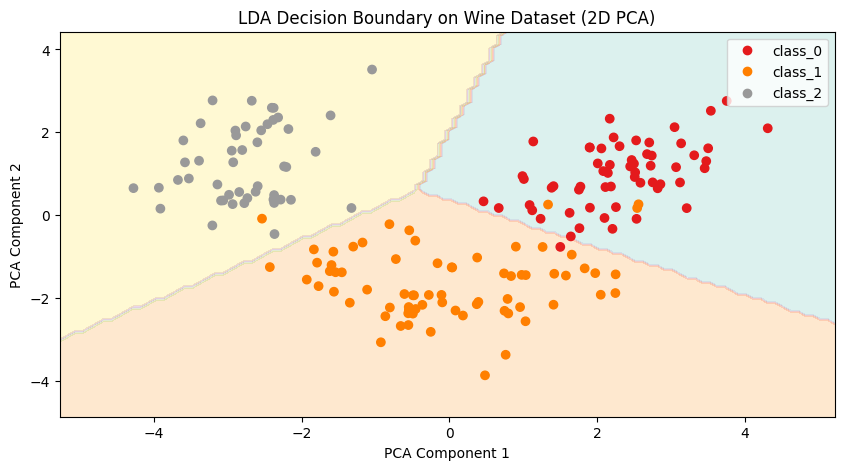

In [19]:
# 6 Visualizing Decision Boundaries
# For visualization, reduce data to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_std)

# Plot decision boundaries for LDA
lda.fit(X_reduced, y)
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Set1')
plt.legend(handles=scatter.legend_elements()[0], labels=wine.target_names.tolist())
plt.title('LDA Decision Boundary on Wine Dataset (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

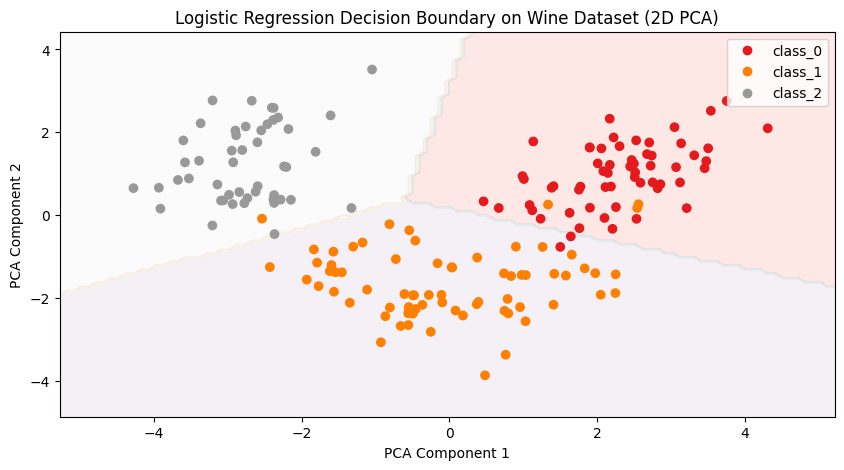

In [20]:
# Decision boundaries for Logistic Regression
log_reg.fit(X_reduced, y)
Z_logreg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z_logreg, alpha=0.3, cmap='Pastel1')
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Set1')
plt.legend(handles=scatter.legend_elements()[0], labels=wine.target_names.tolist())
plt.title('Logistic Regression Decision Boundary on Wine Dataset (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()